<ipython-input-6-85f235cc96c2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=prognosis_counts.index, x=prognosis_counts.values, palette="viridis")


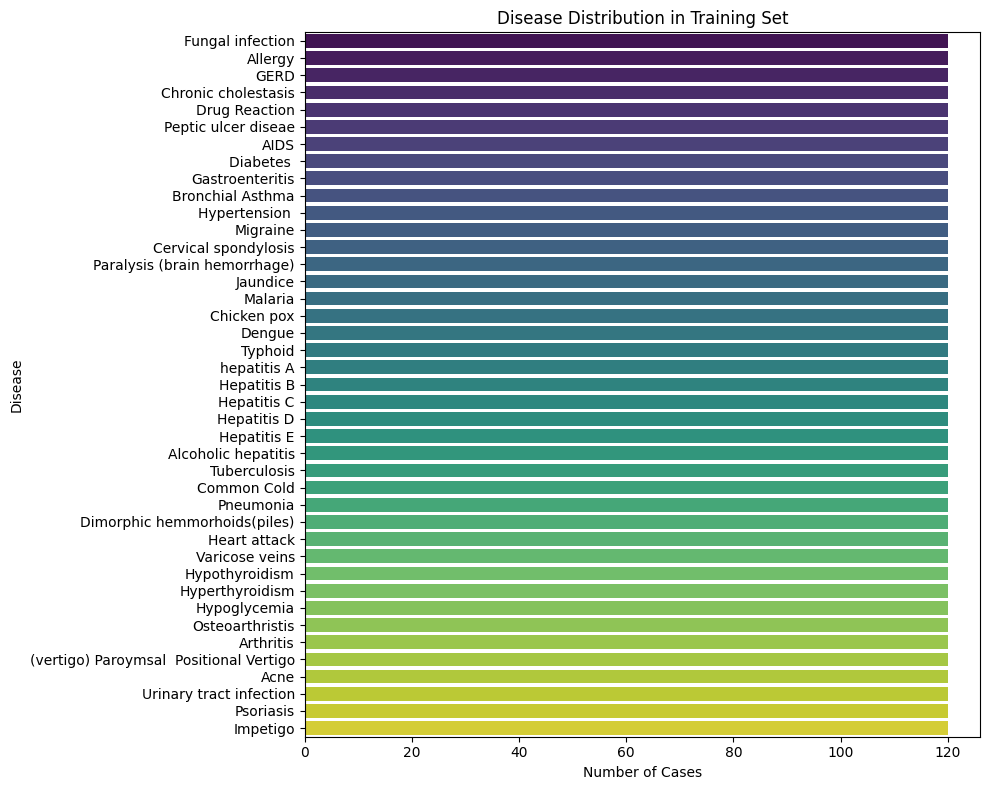

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataframe here.

df = pd.read_csv('/content/Training.csv')

prognosis_counts = df['prognosis'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(y=prognosis_counts.index, x=prognosis_counts.values, palette="viridis")
plt.title("Disease Distribution in Training Set")
plt.xlabel("Number of Cases")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

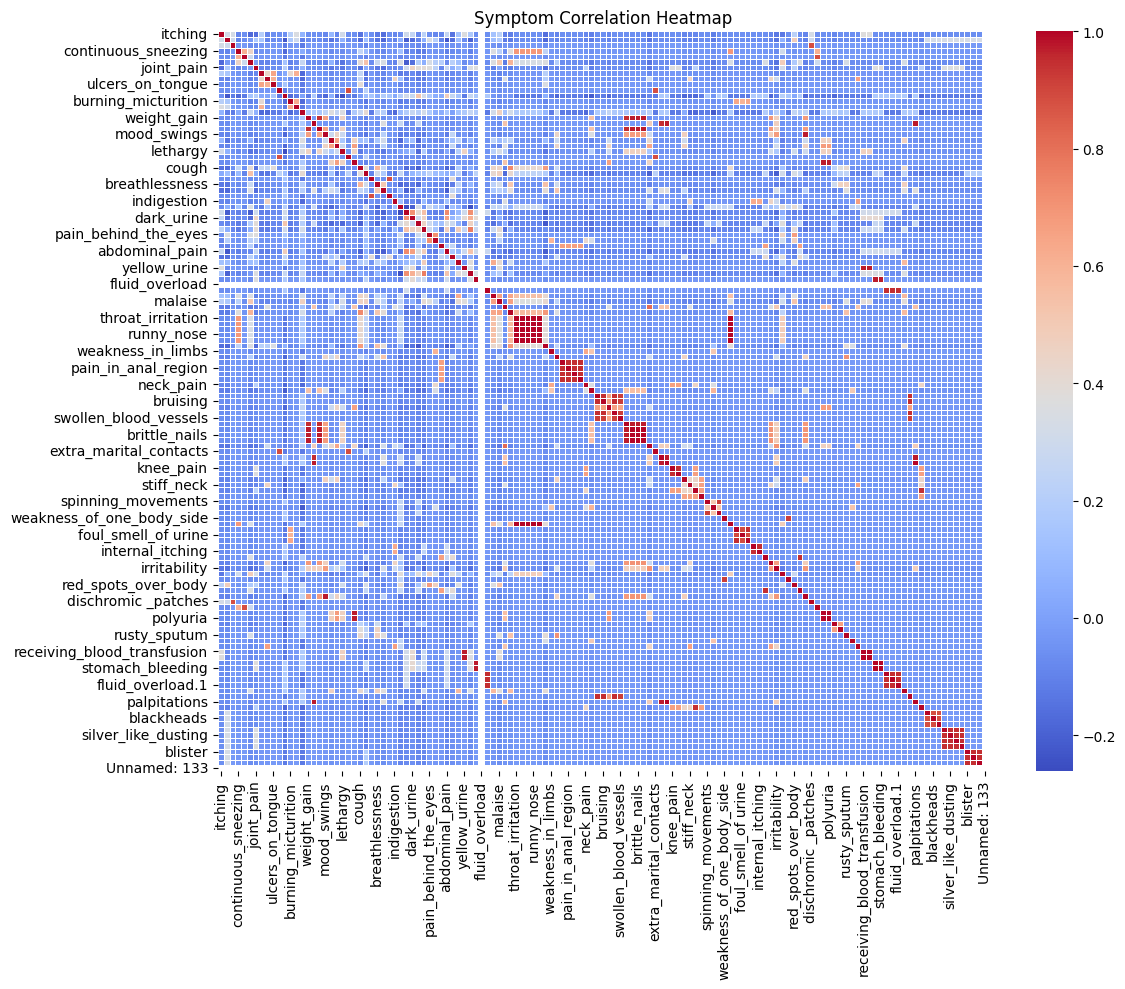

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Training.csv')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix using the numeric DataFrame
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Symptom Correlation Heatmap')
plt.tight_layout()
plt.show()

<ipython-input-5-99b967207682>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_symptoms.values, y=top_symptoms.index, palette="magma")


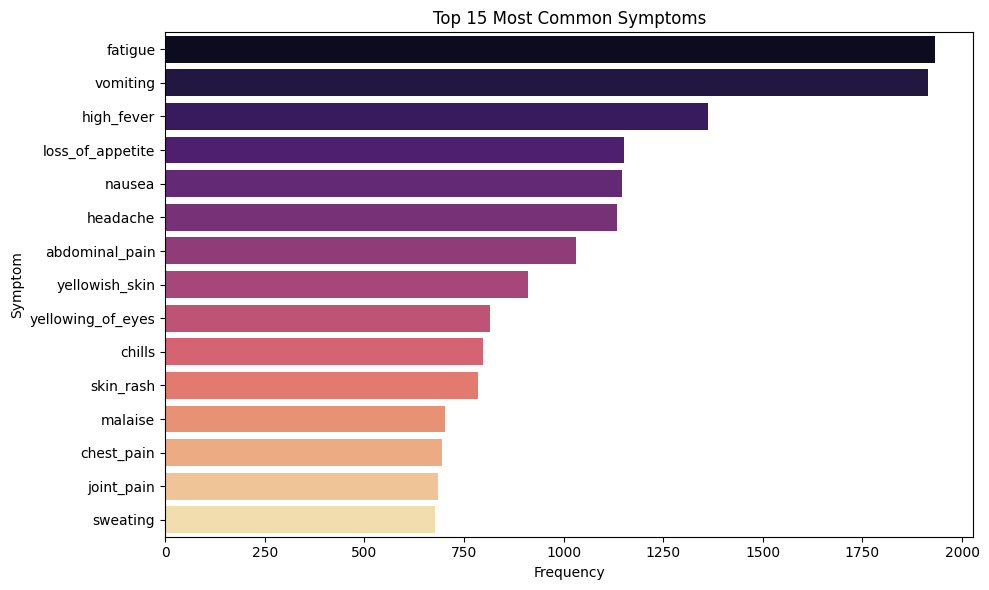

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming symptom columns start from the second column (index 1)

# Load the dataframe
df = pd.read_csv('/content/Training.csv')

# Convert columns to numeric
numeric_df = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

symptom_sums = numeric_df.sum().sort_values(ascending=False)

# Continue with plotting code:
top_symptoms = symptom_sums.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_symptoms.values, y=top_symptoms.index, palette="magma")
plt.title("Top 15 Most Common Symptoms")
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the dataframe
df = pd.read_csv('/content/Training.csv')

# Drop column with only missing values
df.drop(columns=['Unnamed: 133'], inplace=True)

# Impute missing binary symptom values with 0
df.fillna(0, inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataframe
df = pd.read_csv('/content/Training.csv')


le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

In [ ]:
X = df.drop(['prognosis'], axis=1)  # Features
y = df['prognosis']                 # Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train['symptom_count'] = X_train.sum(axis=1)
X_test['symptom_count'] = X_test.sum(axis=1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the dataframe
df = pd.read_csv('/content/Training.csv')

# use 'df'
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

X = df.drop(['prognosis'], axis=1)  # Features
y = df['prognosis']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')  # or strategy='most_frequent' for categorical data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Get the column names from X_train after imputation (it will have 132 columns)
X_train_columns = [f"column_{i}" for i in range(X_train.shape[1])]

# Convert the NumPy arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_train_columns)



X_train['symptom_count'] = X_train.sum(axis=1)
X_test['symptom_count'] = X_test.sum(axis=1)

pca = PCA(n_components=0.95)  # retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the dataframe
df = pd.read_csv('/content/Training.csv')

# use 'df'
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

X = df.drop(['prognosis'], axis=1)  # Features
y = df['prognosis']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before applying PCA
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Get the column names from X_train after imputation
X_train_columns = [f"column_{i}" for i in range(X_train.shape[1])]

# Convert the NumPy arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_train_columns)

X_train['symptom_count'] = X_train.sum(axis=1)
X_test['symptom_count'] = X_test.sum(axis=1)

pca = PCA(n_components=0.95)  # retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the outputs
print("X_train_pca:")
print(X_train_pca)
print("\nX_test_pca:")
print(X_test_pca)

X_train_pca:
[[ 2.68594409e+00 -5.82807316e-01  3.91807641e-01 ... -2.01332422e-01
   2.55077717e-01  2.01703362e-01]
 [ 2.67032691e+00  4.08684653e-01  5.79442382e-01 ...  6.99766988e-01
   2.99069821e-01 -2.48030013e-02]
 [ 3.65614108e+00  9.74939162e-01 -6.14260057e-01 ... -3.97174191e-01
  -1.86044935e-01 -1.13703119e-01]
 ...
 [ 6.73462297e+00  3.28661514e-01  9.70574188e-01 ... -5.07264410e-01
  -2.49572355e-01 -2.41079835e-01]
 [-3.55318869e+00 -1.91587173e-01  3.56768786e-02 ...  4.65560540e-01
  -3.52202898e-01  1.15417108e-01]
 [-2.58556261e+00 -2.43447065e-01 -4.03246341e-03 ...  2.53767723e-01
   2.42441216e-01  3.91916879e-02]]

X_test_pca:
[[-4.53075946 -0.2802825   0.10691161 ...  0.27569217 -0.26051765
  -0.05991708]
 [-3.55864105 -0.31420265  0.05461802 ...  0.37759031 -0.32661197
  -0.08331339]
 [ 3.57311424 -1.05425183 -1.64461185 ... -0.21510342  0.058947
  -0.0429544 ]
 ...
 [ 6.73462297  0.32866151  0.97057419 ... -0.50726441 -0.24957236
  -0.24107984]
 [-4.530673

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=50)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
print("X_train_rfe:")
print(X_train_rfe)
print("\nX_test_rfe:")
print(X_test_rfe)

X_train_rfe:
[[ 1.  1.  0. ...  0.  0. 10.]
 [ 0.  0.  0. ...  0.  0. 10.]
 [ 1.  0.  0. ...  0.  0. 11.]
 ...
 [ 0.  1.  0. ...  0.  0. 14.]
 [ 1.  1.  0. ...  0.  0.  4.]
 [ 1.  1.  0. ...  0.  0.  5.]]

X_test_rfe:
[[ 0.  1.  0. ...  0.  0.  3.]
 [ 0.  1.  0. ...  0.  0.  4.]
 [ 0.  0.  0. ...  0.  0. 11.]
 ...
 [ 0.  1.  0. ...  0.  0. 14.]
 [ 0.  1.  0. ...  0.  0.  3.]
 [ 0.  0.  0. ...  0.  0.  3.]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rfe, y_train)
y_pred_rf = rf.predict(X_test_rfe)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_rfe, y_train)
y_pred_svm = svm.predict(X_test_rfe)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



SVM Accuracy: 0.9939024390243902
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      0.90      0.95        29
          14       1.00      0.88      0.93        24
          15       0.86      1.00      0.93        19
          16       1.00      1.00      1.00     

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_rfe)
labels = kmeans.labels_

score = silhouette_score(X_train_rfe, labels)
print("Silhouette Score for KMeans:", score)

Silhouette Score for KMeans: 0.2408493745497029


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_rfe, y_train)
y_pred_lr = lr.predict(X_test_rfe)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_rfe, y_train)
y_pred_lr = lr.predict(X_test_rfe)

print("Linear Regression Predictions:")
print(y_pred_lr)

Linear Regression Predictions:
[ 2.72401404  1.74401661 25.22292501  0.75416313 11.67166793 22.968595
 25.05348031  3.48166257 18.34697363 29.85595475 37.73573103 12.33823087
 26.35856002 13.2343955   3.84888202  2.86888458 14.72366792 22.45862412
 13.31822831  6.83608815 10.49577283 33.72559718 18.34697363 10.43260694
  4.53120774 14.67055908 29.03905546 30.83595219 26.57763286 29.85595475
 11.67166793 18.34697363 19.61674396 23.57829016 39.77197659 28.57767036
 26.48997428 13.85498209 29.03905546 37.73573103 11.95404038 -0.30203023
 26.06766426 11.05994648 24.57048745 18.63674652 18.41410083 18.34697363
 34.90910994 34.90910994 19.82678626 35.36777636 38.79197915  5.51120518
 25.22292501 15.57130764 35.57424274 13.02591794 37.73573103  9.07831171
 25.05348031 26.20292245 29.66397229 19.82678626  0.67796721 26.57763286
 31.31941683  1.73416057  8.69809656 15.70366535  9.75942617 10.43260694
  1.74401661 23.43862156 26.57763286 14.57632498 26.66987243 26.66987243
 16.1249872  29.855954

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_rfe, y_train)
y_pred_rfr = rfr.predict(X_test_rfe)

print("Random Forest Regressor:")
print(y_pred_lr)

Random Forest Regressor:
[ 2.72401404  1.74401661 25.22292501  0.75416313 11.67166793 22.968595
 25.05348031  3.48166257 18.34697363 29.85595475 37.73573103 12.33823087
 26.35856002 13.2343955   3.84888202  2.86888458 14.72366792 22.45862412
 13.31822831  6.83608815 10.49577283 33.72559718 18.34697363 10.43260694
  4.53120774 14.67055908 29.03905546 30.83595219 26.57763286 29.85595475
 11.67166793 18.34697363 19.61674396 23.57829016 39.77197659 28.57767036
 26.48997428 13.85498209 29.03905546 37.73573103 11.95404038 -0.30203023
 26.06766426 11.05994648 24.57048745 18.63674652 18.41410083 18.34697363
 34.90910994 34.90910994 19.82678626 35.36777636 38.79197915  5.51120518
 25.22292501 15.57130764 35.57424274 13.02591794 37.73573103  9.07831171
 25.05348031 26.20292245 29.66397229 19.82678626  0.67796721 26.57763286
 31.31941683  1.73416057  8.69809656 15.70366535  9.75942617 10.43260694
  1.74401661 23.43862156 26.57763286 14.57632498 26.66987243 26.66987243
 16.1249872  29.85595475 18.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
gs.fit(X_train_rfe, y_train)
best_rf = gs.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}

# Create a GridSearchCV object
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the model
gs.fit(X_train_rfe, y_train)

# Get the best hyperparameters and score
best_params = gs.best_params_
best_score = gs.best_score_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Get the best model
best_rf = gs.best_estimator_



Best Hyperparameters: {'max_depth': None, 'n_estimators': 50}
Best Cross-Validation Score: 1.0


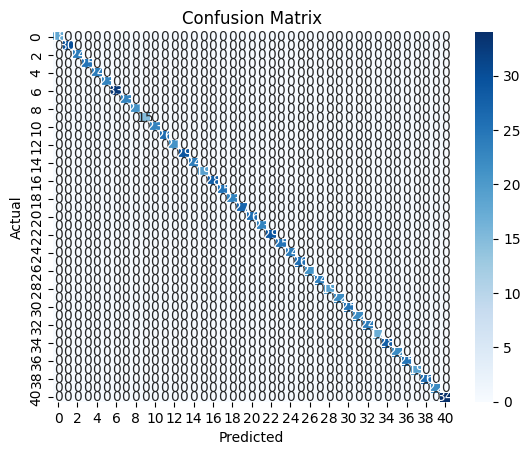

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17       1.00    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix
cm = confusion_matrix(y_test, best_rf.predict(X_test_rfe))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, best_rf.predict(X_test_rfe)))

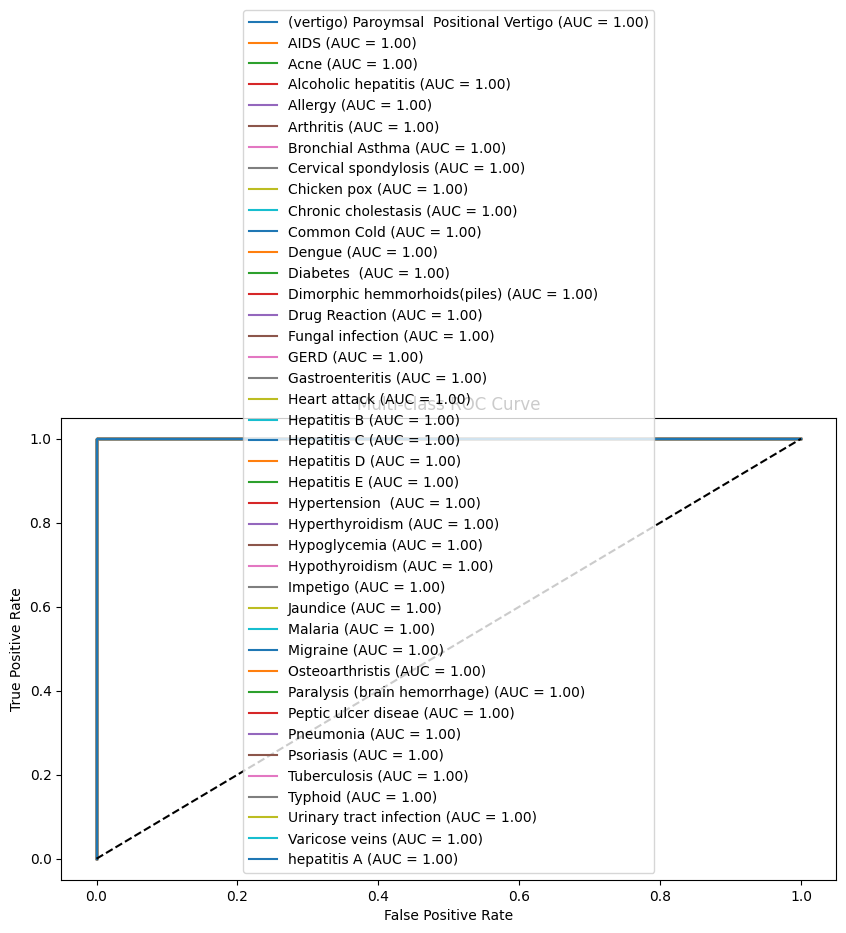

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_bin = label_binarize(y_test, classes=list(range(len(le.classes_))))
y_score = best_rf.predict_proba(X_test_rfe)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Step 1: Import required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, auc, silhouette_score)

# Step 2: Load the training data
df_train = pd.read_csv('/content/Training.csv')



# Step 2: Clean data
df_train.drop(columns=["Unnamed: 133"], inplace=True)
df_train.fillna(0, inplace=True)

# Step 3: Encode target
le = LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])


# Step 4: Split features and target
X = df_train.drop("prognosis", axis=1)
y = df_train["prognosis"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Add feature engineering
X_train["symptom_count"] = X_train.sum(axis=1)
X_test["symptom_count"] = X_test.sum(axis=1)

# Step 7: Feature Selection with RFE
selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=50)
selector.fit(X_train, y_train)
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

# Step 8: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rfe, y_train)
y_pred_rf = rf_model.predict(X_test_rfe)

# Step 9: SVM Classifier
svm_model = SVC(probability=True)
svm_model.fit(X_train_rfe, y_train)
y_pred_svm = svm_model.predict(X_test_rfe)

# Step 10: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_rfe, y_train)
y_pred_lr = lr_model.predict(X_test_rfe)

# Step 11: Random Forest Regressor
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train_rfe, y_train)
y_pred_rfr = rfr_model.predict(X_test_rfe)

# Step 12: KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_rfe)
cluster_labels = kmeans.labels_
silhouette = silhouette_score(X_train_rfe, cluster_labels)

# Step 13: Evaluation - Confusion Matrix and Classification Report for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Step 14: ROC Curve (Multi-class)
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_score_rf = rf_model.predict_proba(X_test_rfe)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Store everything
model_results = {
    "confusion_matrix_rf": cm_rf,
    "classification_report_rf": report_rf,
    "roc_auc_rf": roc_auc,
    "silhouette_score_kmeans": silhouette
}
model_results.keys()

dict_keys(['confusion_matrix_rf', 'classification_report_rf', 'roc_auc_rf', 'silhouette_score_kmeans'])